<a href="https://colab.research.google.com/github/RtjShreyD/CV-DL/blob/master/Rotate2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
import numpy as np
import imutils
import cv2
from google.colab.patches import cv2_imshow

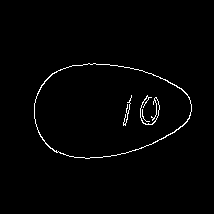

In [5]:
image = cv2.imread("pill_01.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)
edged = cv2.Canny(gray, 20, 100)

cv2_imshow(edged)

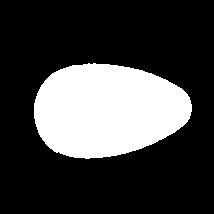

In [12]:
# find contours in the edge map
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# ensure at least one contour was found
if len(cnts) > 0:
	# grab the largest contour, then draw a mask for the pill
	c = max(cnts, key=cv2.contourArea)
	mask = np.zeros(gray.shape, dtype="uint8")
	cv2.drawContours(mask, [c], -1, 255, -1)
 
	# compute its bounding box of pill, then extract the ROI,
	# and apply the mask
	(x, y, w, h) = cv2.boundingRect(c)
	imageROI = image[y:y + h, x:x + w]
	maskROI = mask[y:y + h, x:x + w]
	imageROI = cv2.bitwise_and(imageROI, imageROI, maskROI)
cv2_imshow(mask)

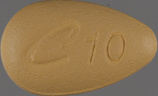

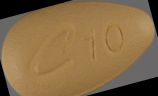

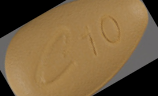

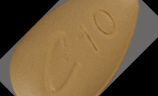

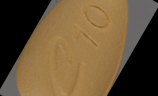

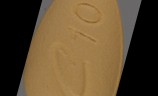

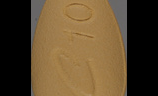

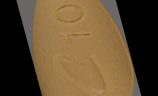

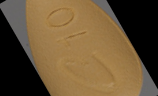

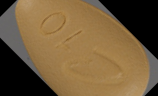

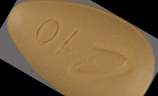

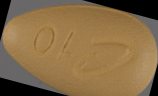

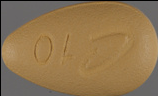

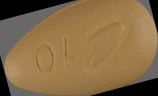

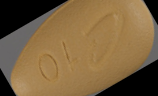

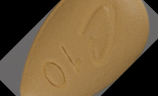

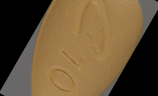

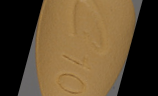

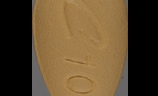

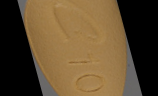

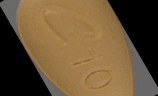

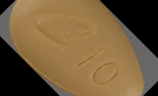

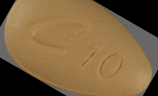

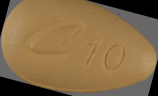

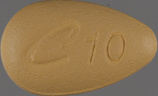

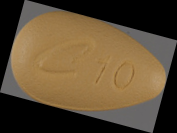

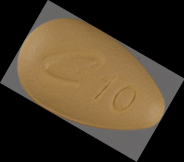

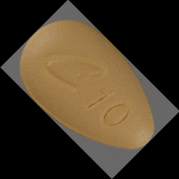

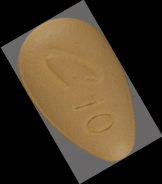

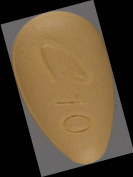

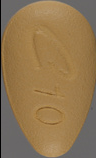

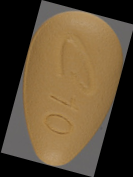

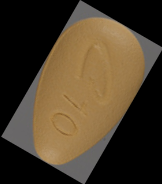

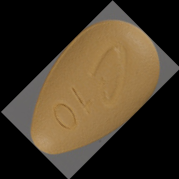

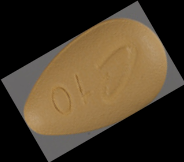

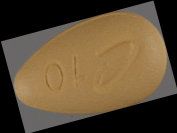

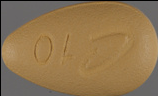

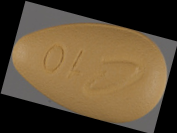

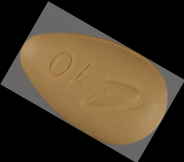

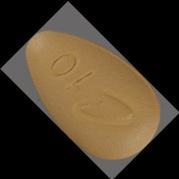

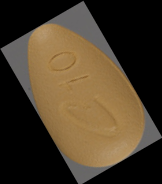

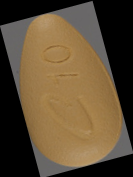

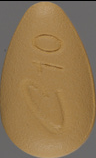

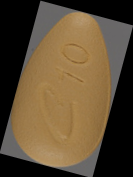

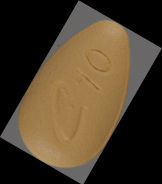

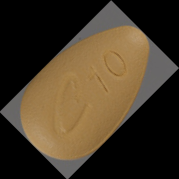

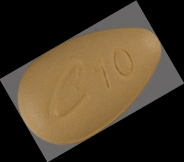

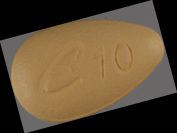

In [14]:
# loop over the rotation angles
	for angle in np.arange(0, 360, 15):
		rotated = imutils.rotate(imageROI, angle)
		cv2_imshow(rotated)
		cv2.waitKey(0)
 
	# loop over the rotation angles again, this time ensure the
	# entire pill is still within the ROI after rotation
	for angle in np.arange(0, 360, 15):
		rotated = imutils.rotate_bound(imageROI, angle)
		cv2_imshow(rotated)
		cv2.waitKey(0)